In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/crop_yield.csv.zip')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [ ]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


**Preprocessing of the dataset**

In [ ]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Drop rows with missing values
df = df.dropna()

# Convert numerical columns to appropriate types
df['crop_year'] = df['crop_year'].astype(int)
df['area'] = df['area'].astype(float)
df['production'] = df['production'].astype(float)
df['yield'] = df['yield'].astype(float)

# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Sweet potato', 'Rice', 'Other Cereals', 'Masoor', 'Castor seed', 'Guar seed', 'Cotton(lint)', 'Peas & beans (Pulses)', 'Safflower', 'Tobacco', 'Moong(Green Gram)', 'Ginger', 'Sugarcane', 'Groundnut', 'Coriander', 'Horse-gram', 'Banana', 'Potato', 'Sesamum', 'Cowpea(Lobia)', 'Maize', 'Gram', 'Jute', 'Turmeric', 'Coconut ', 'Rapeseed &Mustard', 'Jowar', 'Cashewnut', 'Sunflower', 'Other Kharif pulses', 'Cardamom', 'Arecanut', 'Soyabean', 'Niger seed', 'Moth', 'Dry chillies', 'Barley', 'Other  Rabi pulses', 'Sannhamp', 'Other Summer Pulses', 'Ragi', 'Oilseeds total', 'Mesta', 'other oilseeds', 'Wheat', 'Tapioca', 'Garlic', 'Khesari', 'Urad', 'Bajra', 'Onion', 'Arhar/Tur', 'Small millets', 'Linseed', 'Black pepper'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


**Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

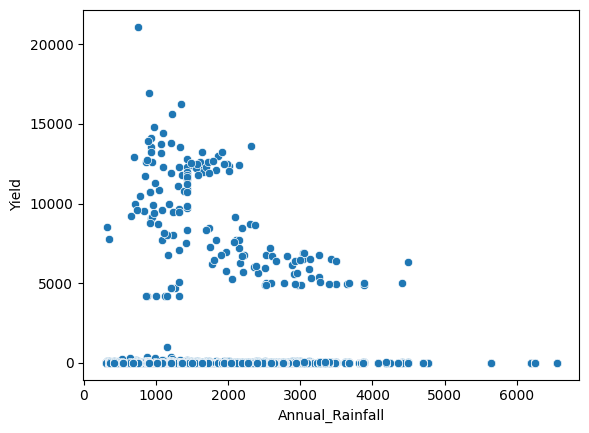

In [ ]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

**Year wise analysis of agricultural production**

In [ ]:
df_year = df[df['Crop_Year']!=2020]

In [ ]:
year_yield = df_year.groupby('Crop_Year').sum()
year_yield

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,ArecanutArhar/TurBajraBajraBajraBananaBlack pe...,Whole Year Kharif Kharif Rabi Su...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,ArecanutArhar/TurBajraBajraBananaCashewnutCast...,Whole Year Kharif Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


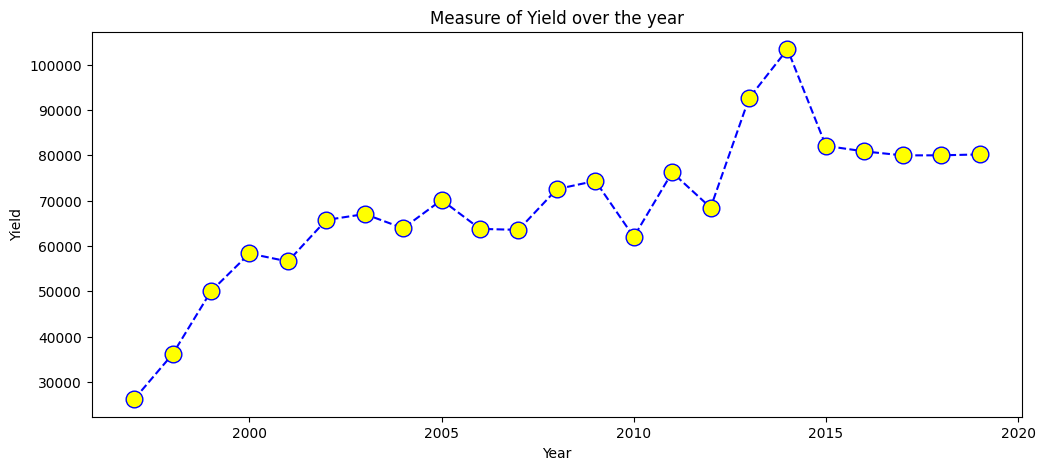

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

**It can be observed that the yield has increased over the year, but after 2014 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility¶**

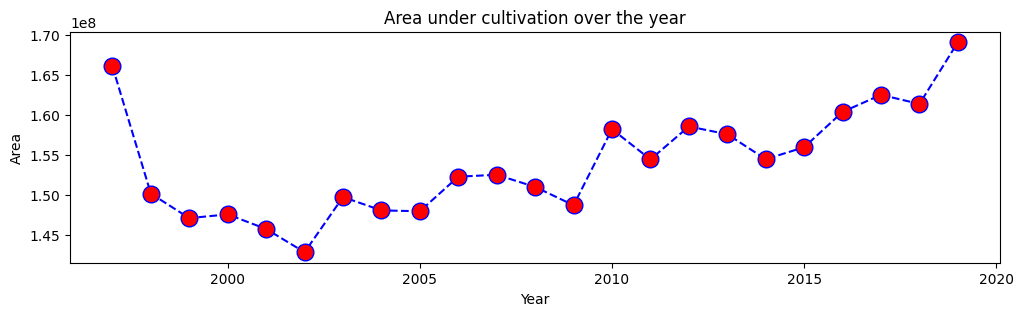

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

**It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture**

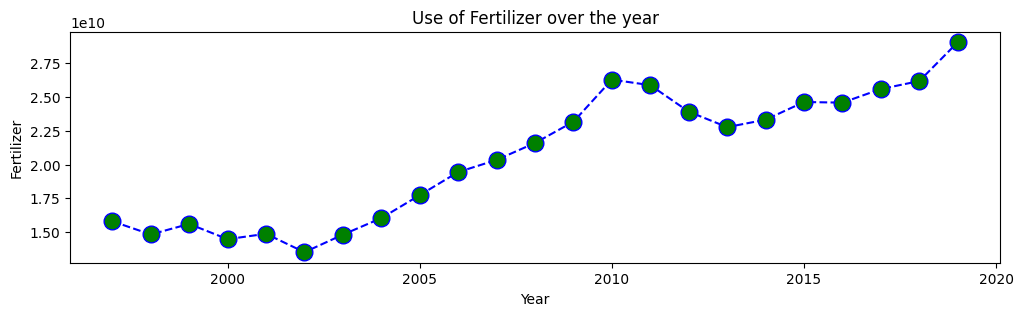

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

**The use of Fertilizer in the fields is increasing**

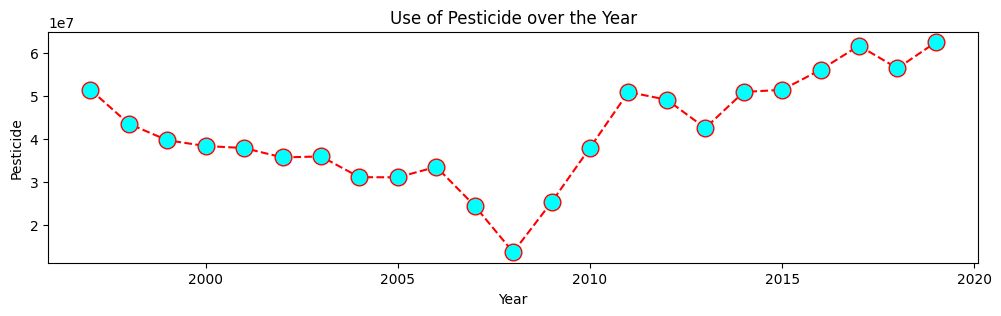

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

**State wise analysis of agricultural production**

In [ ]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,,,
West Bengal,ArecanutArhar/TurBajraBarleyCardamomCastor see...,2196856,Whole Year Whole Year Kharif Whole Year Wh...,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179
Puducherry,ArecanutBajraBlack pepperCorianderCotton(lint)...,1346899,Kharif Kharif Kharif Kharif Su...,6.535410e+05,493815573,9.599160e+05,8.480729e+07,1.705159e+05,232163.600840
Andhra Pradesh,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,2543550,Whole Year Kharif Rabi Kharif Ra...,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723
Tamil Nadu,ArecanutArhar/TurBajraBananaCashewnutCastor se...,1652030,Whole Year Kharif Kharif Whole Year Wh...,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648
Assam,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,1468138,Whole Year Kharif Kharif Whole Year Kh...,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362
Karnataka,ArecanutArhar/TurBajraBajraBlack pepperCardamo...,2876568,Whole Year Kharif Kharif Summer Kh...,2.579074e+08,63772797366,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Kerala,ArecanutBlack pepperCashewnutCoconut TapiocaAr...,1072892,Whole Year Whole Year Whole Year Whole Year Wh...,3.639106e+07,129700649853,1.536641e+06,4.744603e+09,9.647595e+06,147710.353263
Goa,ArecanutBananaBlack pepperCashewnutCoconut Gro...,494067,Whole Year Whole Year Whole Year Whole Year Wh...,2.749600e+06,2193998349,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Telangana,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,800319,Kharif Rabi Kharif Rabi Wh...,3.979214e+07,147700034,3.955095e+05,6.262533e+09,1.356572e+07,39508.727733


In [ ]:
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers

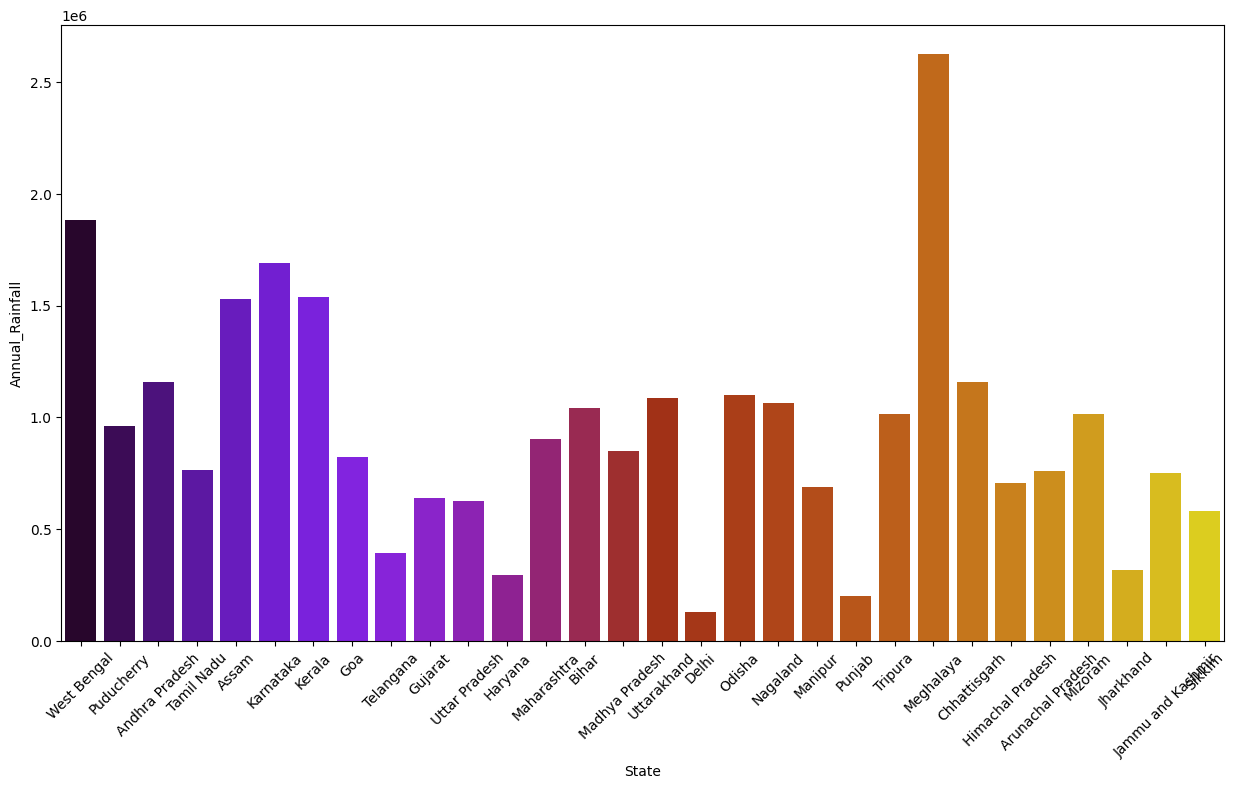

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 45)
plt.show()

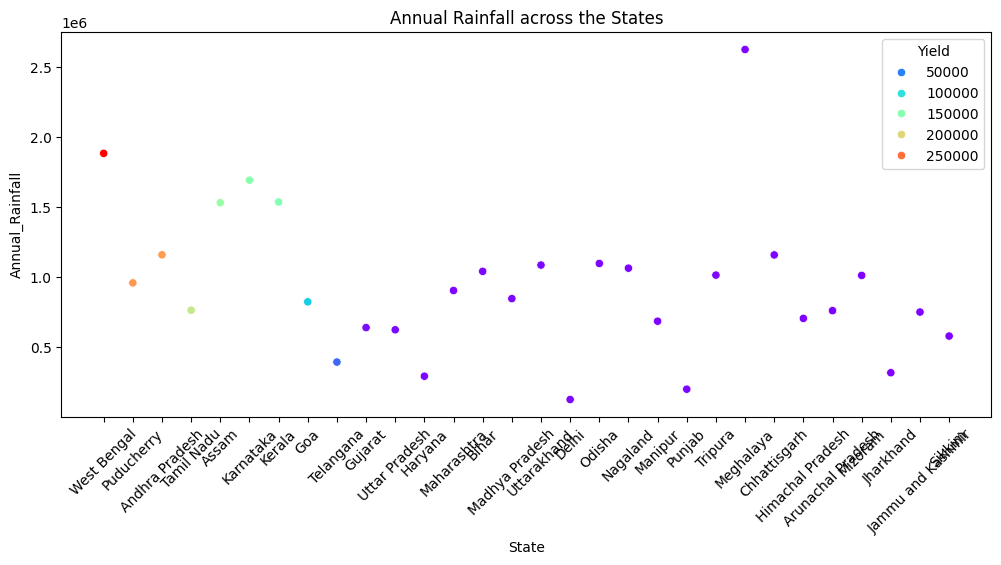

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

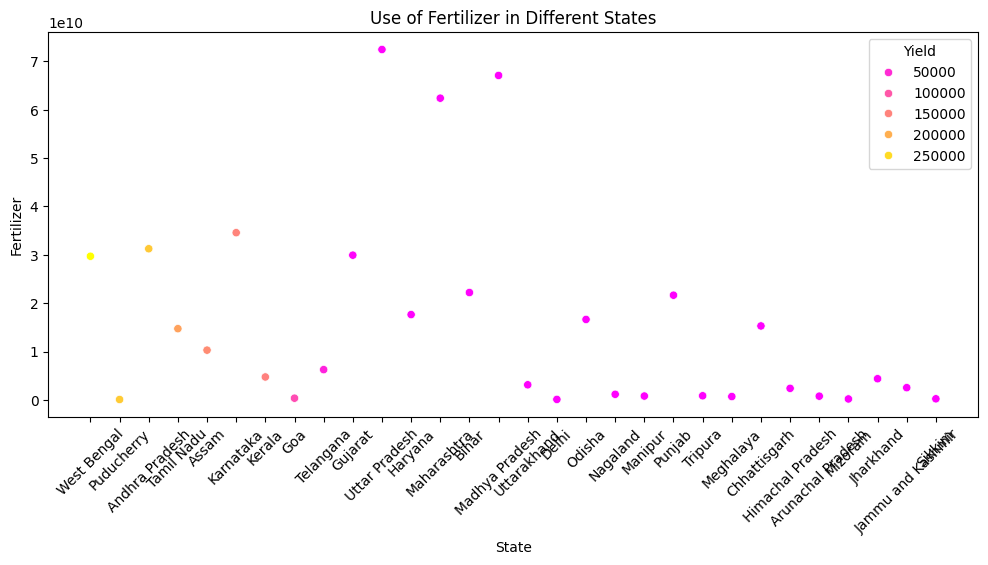

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

Observations:
Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
West Bengal has the maximum yield
Uttar Pradesh, Haryana, Maharashtra are using hig

In [ ]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

,Crop,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Season,,,,,,,,,
Autumn,RiceRagiRiceRiceRiceRiceRiceRiceDry chilliesRi...,832058,AssamWest BengalWest BengalAssamKeralaWest Ben...,5.862637e+07,84406651,7.031759e+05,7.696200e+09,1.552829e+07,1621.837556
Kharif,Arhar/TurCastor seedCotton(lint)JuteMaizeMesta...,16538965,AssamAssamAssamAssamAssamAssamAssamAssamKarnat...,1.702742e+09,5402484780,1.131835e+07,2.282723e+11,4.624902e+08,20431.840607
Rabi,GramLinseedOther Rabi pulsesRapeseed &Mustard...,11539594,AssamAssamAssamAssamAssamKarnatakaKarnatakaKar...,1.172588e+09,2837368229,7.970757e+06,1.564345e+11,3.218366e+08,11418.068860
Summer,RiceBajraJowarMaizeRagiRiceMoong(Green Gram)Ri...,2402524,AssamKarnatakaKarnatakaKarnatakaKarnatakaKarna...,9.879112e+07,243731156,1.565900e+06,1.371903e+10,2.732111e+07,3581.857123
Winter,RiceRiceRiceRiceRiceRiceRicePotatoRiceSesamumR...,781718,AssamWest BengalAssamKeralaWest BengalAssamKer...,2.806847e+08,586507936,6.709910e+05,3.811857e+10,7.590270e+07,2056.746957


In [ ]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [ ]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])
fig.show()

Observations:
Area under cultivation in Kharif season is highest, second is Rabi season
Crops in autumn, summer are not grown over large area
Yield in India is maximum in Kharif season

**Crop wise Analysis**

In [ ]:
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [ ]:
df_yz.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.94,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.18,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.00,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.25,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.00,0.0


<Figure size 2500x1500 with 0 Axes>

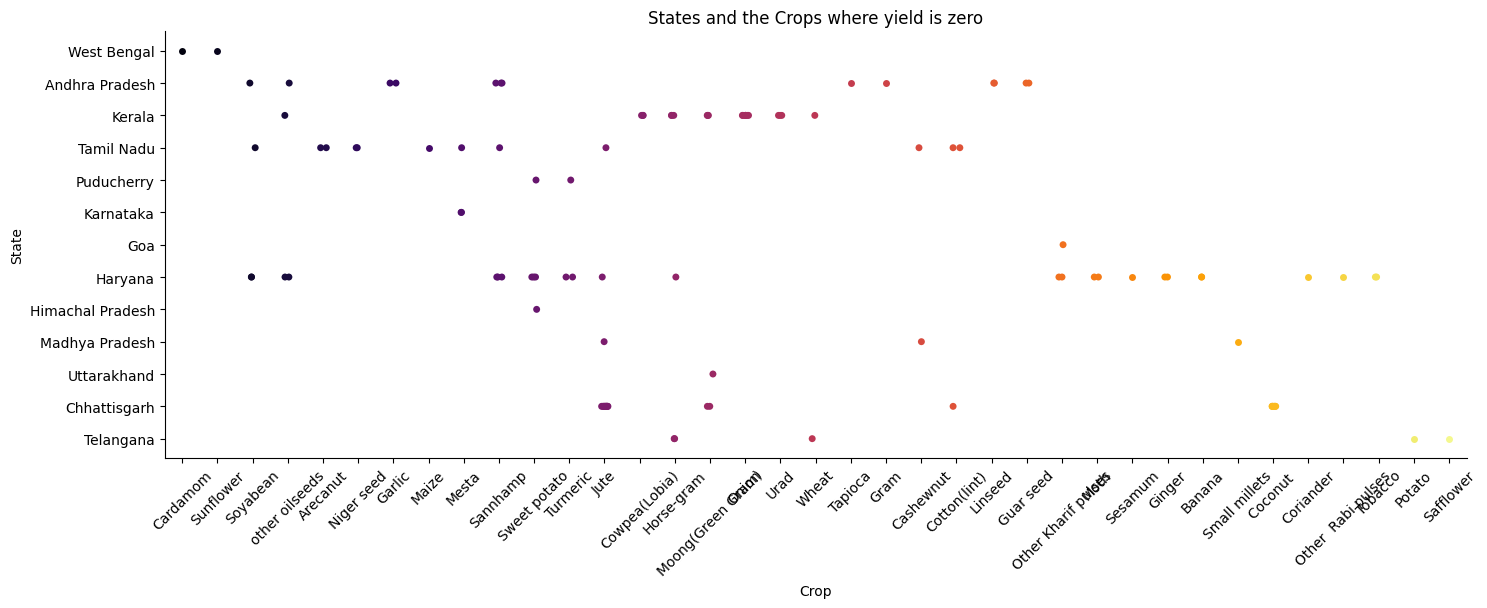

In [ ]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [ ]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Arecanut,321347,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKarnatakaKeralaMeghalayaWest BengalPuduch...,8.765158e+06,39144261,3.414578e+05,1.226556e+09,2.449481e+06,3.359289e+02
Arhar/Tur,1020541,Kharif Kharif Kharif Whole Year Kh...,AssamKarnatakaMeghalayaWest BengalAssamKarnata...,8.235357e+07,60913833,7.103078e+05,1.121027e+10,2.280705e+07,4.914127e+02
Bajra,1052589,Kharif Summer Kharif Kharif Kh...,KarnatakaKarnatakaWest BengalPuducherryKarnata...,9.335810e+07,118137047,5.566748e+05,1.205114e+10,2.465983e+07,1.271990e+03
Banana,488061,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7.127321e+06,226471979,4.199956e+05,9.805713e+08,1.916819e+06,6.578526e+03
Barley,596557,Whole Year Rabi Rabi Rabi Ra...,West BengalWest BengalWest BengalWest BengalWe...,9.270084e+06,19498687,3.474722e+05,1.190739e+09,2.472432e+06,4.738754e+02
Black pepper,253163,Kharif Whole Year Kharif Whole Year Wh...,KarnatakaKeralaPuducherryGoaKarnatakaKeralaGoa...,4.362226e+06,2095650,2.700002e+05,5.699445e+08,1.150606e+06,1.045302e+02
Cardamom,146569,Whole Year Whole Year Whole Year Whole Year Wh...,KarnatakaKarnatakaKeralaWest BengalKeralaWest ...,1.305532e+06,255490,1.241488e+05,1.714790e+08,3.433323e+05,1.245829e+01
Cashewnut,265313,Whole Year Whole Year Whole Year Whole Year Wh...,KeralaGoaKeralaGoaKeralaPuducherryAndhra Prade...,7.472794e+06,3737207,2.581485e+05,1.005401e+09,2.003926e+06,4.181387e+02
Castor seed,602681,Kharif Rabi Whole Year Kharif Kh...,AssamMeghalayaWest BengalAssamKarnatakaWest Be...,1.659632e+07,24049211,4.144262e+05,2.248189e+09,4.560667e+06,2.080828e+02


The amount of Fertilizer used is maximum in Rice Crop    
The second crop to use more fertilizer is Wheat crop

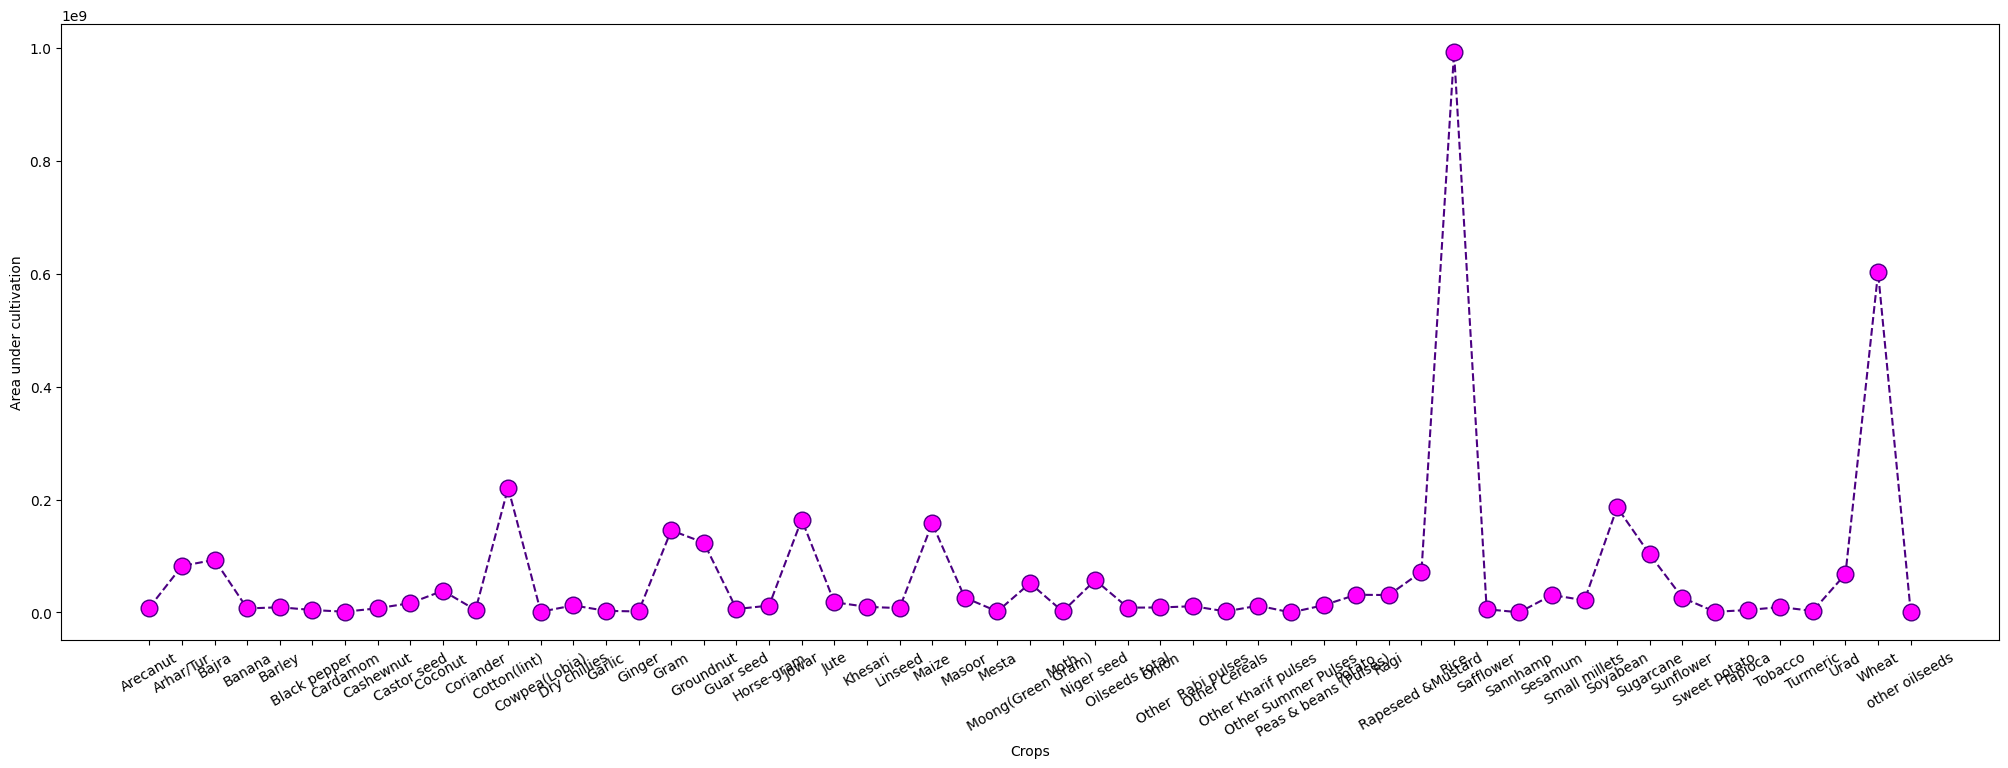

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

Area under cultivation is larger for Rice and Wheat crops

Analysis of Wheat crop

In [ ]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,1997,Rabi,Assam,84698.0,110054,2051.4,8060708.66,26256.38,1.259524
1,Wheat,1997,Rabi,Karnataka,250698.0,118512,1266.7,23858928.66,77716.38,0.548333
2,Wheat,1997,Rabi,Meghalaya,4287.0,6894,3818.2,407993.79,1328.97,1.385000
3,Wheat,1997,Rabi,West Bengal,367374.0,810480,1852.9,34962983.58,113885.94,1.886667
4,Wheat,1998,Rabi,Assam,89591.0,90509,2354.4,8851590.80,25981.39,0.999545
...,...,...,...,...,...,...,...,...,...,...
540,Wheat,2016,Summer,Odisha,57.0,80,1460.5,8735.25,19.95,0.950000
541,Wheat,2017,Summer,Odisha,73.0,158,1344.4,11493.12,27.74,2.387143
542,Wheat,2018,Summer,Odisha,147.0,268,1635.9,23843.40,51.45,1.825000
543,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000


In [ ]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
df_wheat_year

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamKarnatakaMeghalayaWest BengalOdishaAndhra...,23500898.00,57999331,26765.700000,2.236580e+09,7.285278e+06,27.898176
1998,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamKarnatakaMeghalayaWest BengalAndhra Prade...,24431921.00,63793372,36709.200000,2.413874e+09,7.085257e+06,37.380180
1999,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,AssamWest BengalBiharGujaratHaryanaHimachal Pr...,24503856.00,69250974,24912.400000,2.600594e+09,6.616041e+06,36.165537
2000,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,23338921.00,64029373,32021.900000,2.291182e+09,6.068119e+06,40.728373
2001,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24027129.00,66343193,30835.900000,2.453891e+09,6.247054e+06,41.967366
2002,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamWest BengalBiharChhattisgar...,23410674.69,60953946,30737.700000,2.216289e+09,5.852669e+06,42.687343
2003,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24734430.70,66979279,34939.400000,2.448214e+09,5.936263e+06,43.222580
2004,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,KarnatakaMeghalayaAndhra PradeshAssamBiharChha...,24789592.58,63933294,35241.300000,2.685704e+09,5.205814e+06,44.138495
2005,WheatWheatWheatWheatWheatWheatWheatWheatWheatW...,Rabi Rabi Rabi Rabi Ra...,Andhra PradeshAssamKarnatakaMeghalayaWest Beng...,24101857.23,61514930,34308.900000,2.890295e+09,5.061390e+06,40.127099


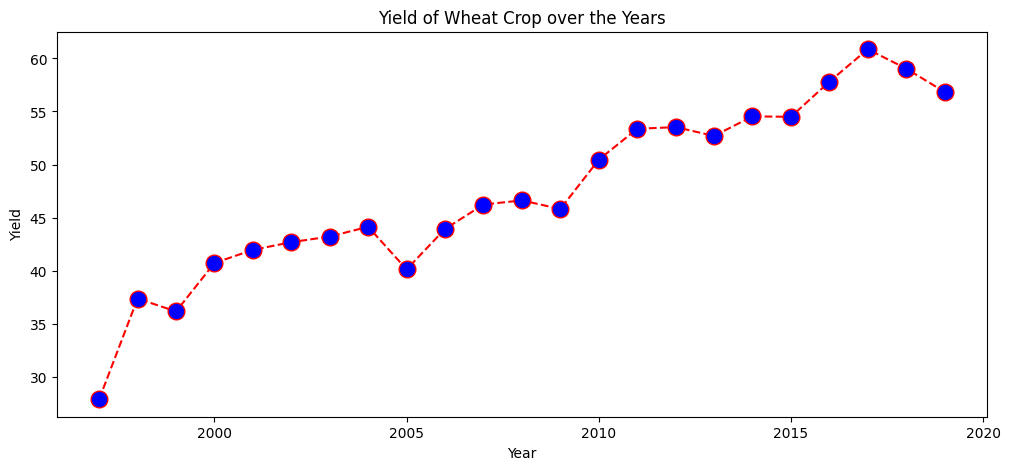

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

Fertilizer and Pesticide are showing the same corelation. Hence, have to drop one column to avoid Multicollinearity

**Modelling**

In [ ]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

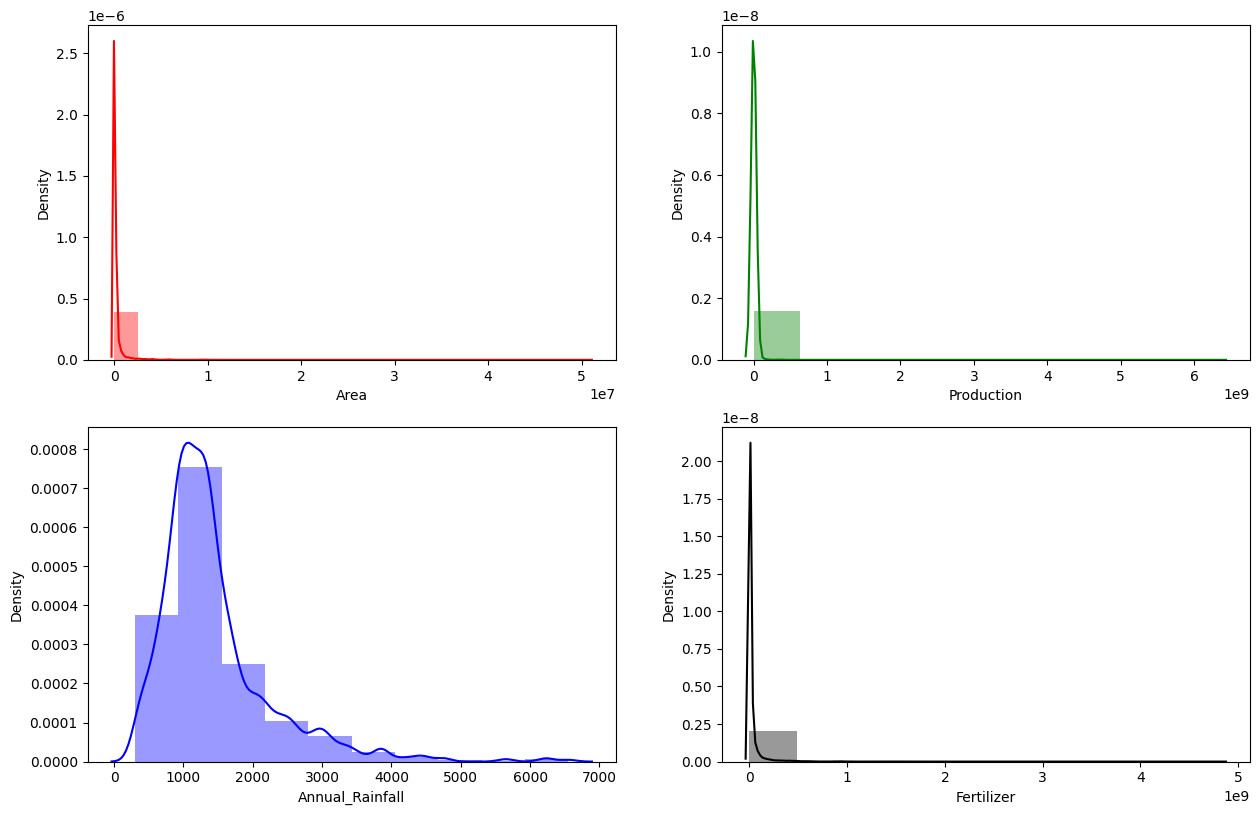

In [ ]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

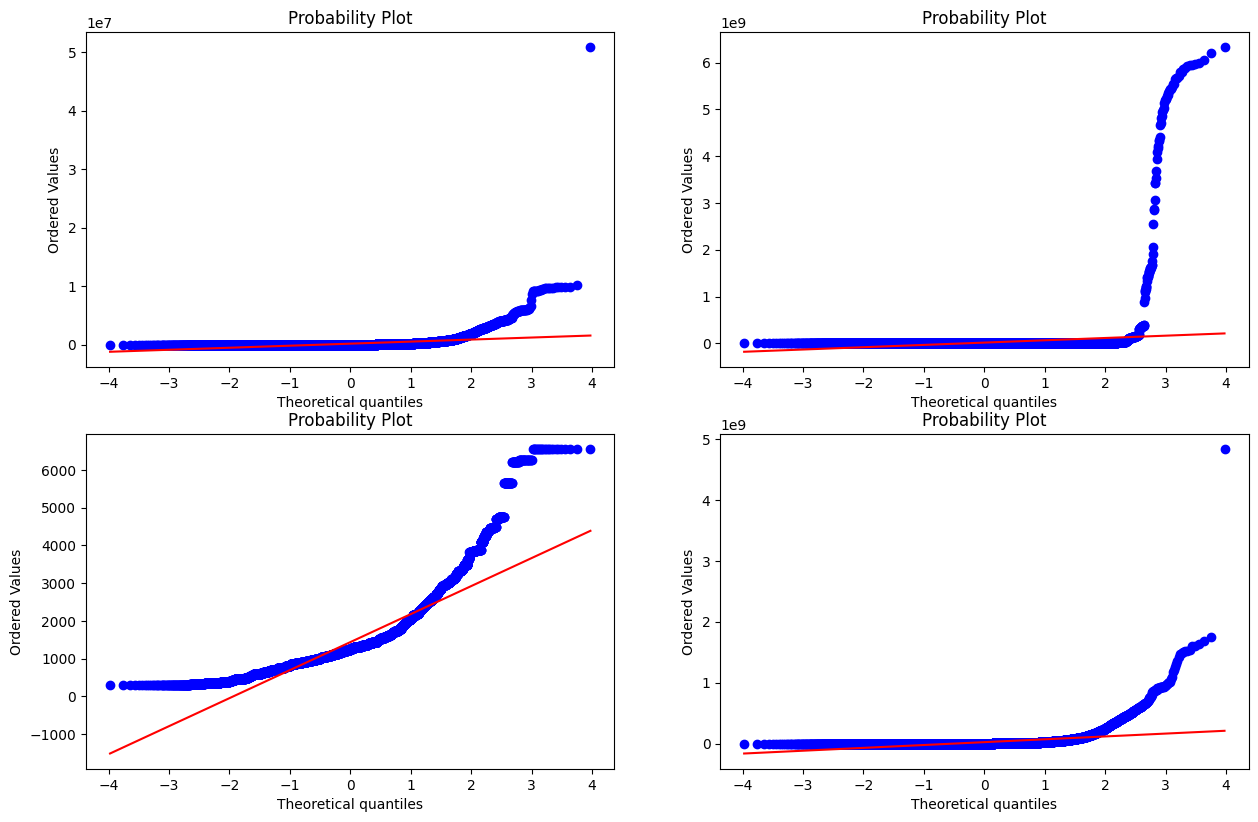

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

In [ ]:
# Focus on a single crop (e.g., "Wheat") or aggregate all crops
crop_name = "Wheat"  # Change as needed
filtered_data = df[df['Crop'] == crop_name]

# Aggregate yearly average yield for the selected crop
time_series_data = filtered_data.groupby('Crop_Year')['Yield'].mean().reset_index()

# Rename columns for clarity
time_series_data.rename(columns={'Crop_Year': 'Year', 'Yield': 'Average_Yield'}, inplace=True)

# Check the prepared time series data
print(time_series_data.head())

   Year  Average_Yield
0  1997       1.641069
1  1998       1.869009
2  1999       2.009197
3  2000       1.851290
4  2001       1.907608


**ARIMA MODEL**

ADF Statistic: -2.1382058798362387
p-value: 0.2294318152884866


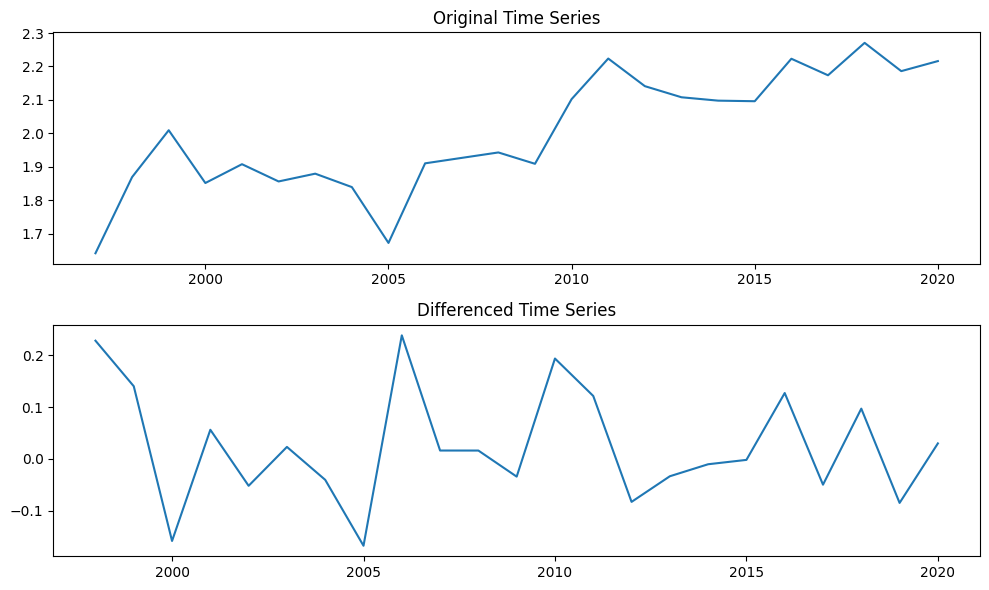

                               SARIMAX Results                                
Dep. Variable:          Average_Yield   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  18.472
Date:                Tue, 19 Nov 2024   AIC                            -30.943
Time:                        12:25:24   BIC                            -27.537
Sample:                             0   HQIC                           -30.086
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2866      0.975      0.294      0.769      -1.625       2.198
ma.L1         -0.5596      0.951     -0.588      0.556      -2.424       1.304
sigma2         0.0117      0.004      3.141      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Check stationarity using ADF test
result = adfuller(time_series_data['Average_Yield'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing if needed
time_series_data['Yield_Diff'] = time_series_data['Average_Yield'].diff()

# Plot original and differenced data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series_data['Year'], time_series_data['Average_Yield'], label="Original Data")
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(time_series_data['Year'], time_series_data['Yield_Diff'], label="Differenced Data")
plt.title('Differenced Time Series')
plt.tight_layout()
plt.show()

# Fit ARIMA model
model = ARIMA(time_series_data['Average_Yield'], order=(1, 1, 1))  # Change (p, d, q) as needed
fitted_model = model.fit()
print(fitted_model.summary())

# Check stationarity using ADF test
result = adfuller(time_series_data['Average_Yield'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

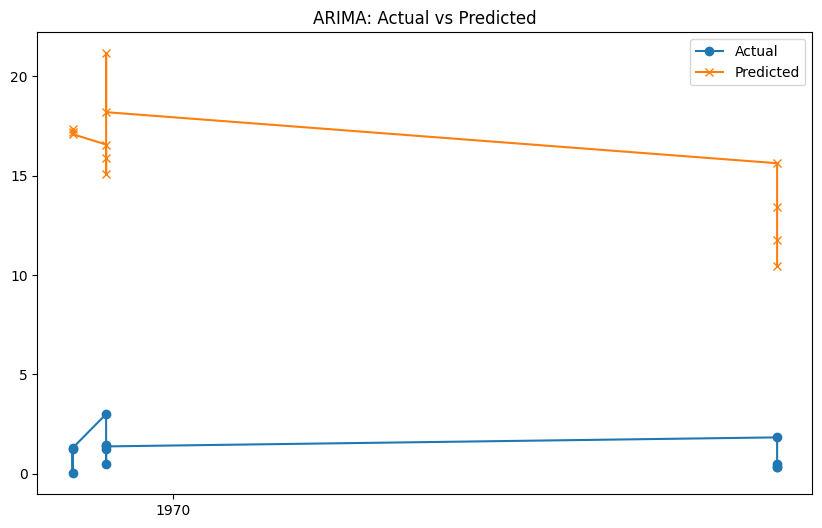

ARIMA RMSE: 14.96, MAE: 14.73


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

df['ds'] = pd.to_datetime(df['ds'])  # Replace with actual date column
df.set_index('ds', inplace=True)

# Train-Test Split
train = df.iloc[:-12]
test = df.iloc[-12:]

# ARIMA Model
model = ARIMA(train['y'], order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['y'], label='Actual', marker='o')
plt.plot(test.index, forecast, label='Predicted', marker='x')
plt.title("ARIMA: Actual vs Predicted")
plt.legend()
plt.show()

# Error Metrics
rmse = np.sqrt(mean_squared_error(test['y'], forecast))
mae = mean_absolute_error(test['y'], forecast)
print(f"ARIMA RMSE: {rmse:.2f}, MAE: {mae:.2f}")


**SARIMA MODEL**

                                     SARIMAX Results                                      
Dep. Variable:                      Average_Yield   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  10.843
Date:                            Tue, 19 Nov 2024   AIC                            -11.685
Time:                                    12:25:30   BIC                             -9.696
Sample:                                         0   HQIC                           -12.939
                                             - 24                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0039     36.258     -0.000      1.000     -71.068      71.060
ma.L1         -0.0045     36.228   

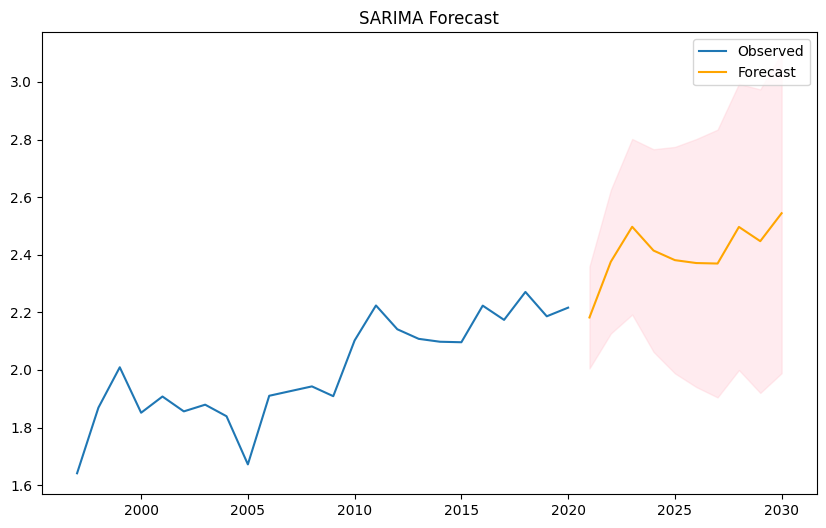

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Seasonal ARIMA (example with annual seasonality)
sarima_model = SARIMAX(time_series_data['Average_Yield'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order based on data
sarima_fitted = sarima_model.fit()

print(sarima_fitted.summary())

# Forecasting
forecast = sarima_fitted.get_forecast(steps=10)
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Year'], time_series_data['Average_Yield'], label="Observed")
plt.plot(range(time_series_data['Year'].iloc[-1] + 1, time_series_data['Year'].iloc[-1] + 11),
         forecast.predicted_mean, label="Forecast", color='orange')
plt.fill_between(range(time_series_data['Year'].iloc[-1] + 1, time_series_data['Year'].iloc[-1] + 11),
                 forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with a

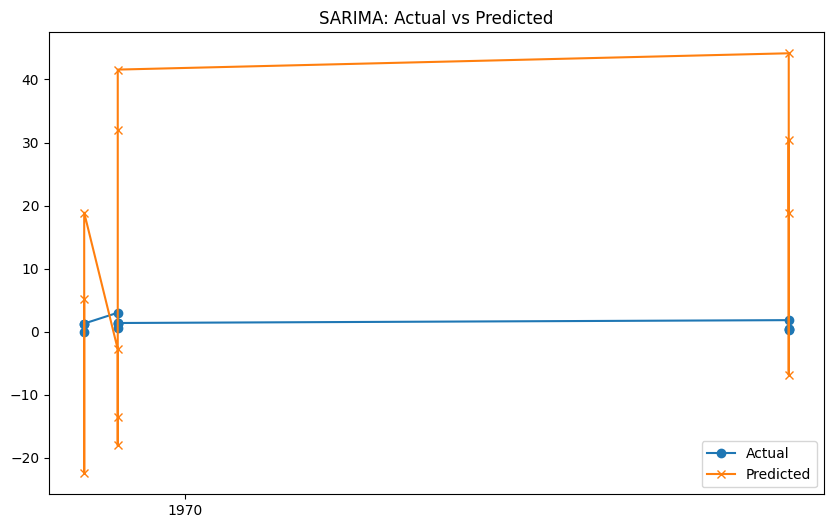

SARIMA RMSE: 24.29, MAE: 21.03


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model
model = SARIMAX(train['y'],
                order=(1, 1, 1),  # ARIMA(p, d, q)
                seasonal_order=(1, 1, 1, 12))  # SARIMA(P, D, Q, S)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['y'], label='Actual', marker='o')
plt.plot(test.index, forecast, label='Predicted', marker='x')
plt.title("SARIMA: Actual vs Predicted")
plt.legend()
plt.show()

# Error Metrics
rmse = np.sqrt(mean_squared_error(test['y'], forecast))
mae = mean_absolute_error(test['y'], forecast)
print(f"SARIMA RMSE: {rmse:.2f}, MAE: {mae:.2f}")


**VAR MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Nov, 2024
Time:                     12:25:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    64.6704
Nobs:                     21.0000    HQIC:                   62.6453
Log likelihood:          -719.073    FPE:                2.11588e+27
AIC:                      62.0840    Det(Omega_mle):     3.07931e+26
--------------------------------------------------------------------
Results for equation Annual_Rainfall
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   2290.078525      1950.491311            1.174           0.240
L1.Annual_Rainfall         0.259105         0.657021            0.394           0.693
L1.Fertilizer             -0.0

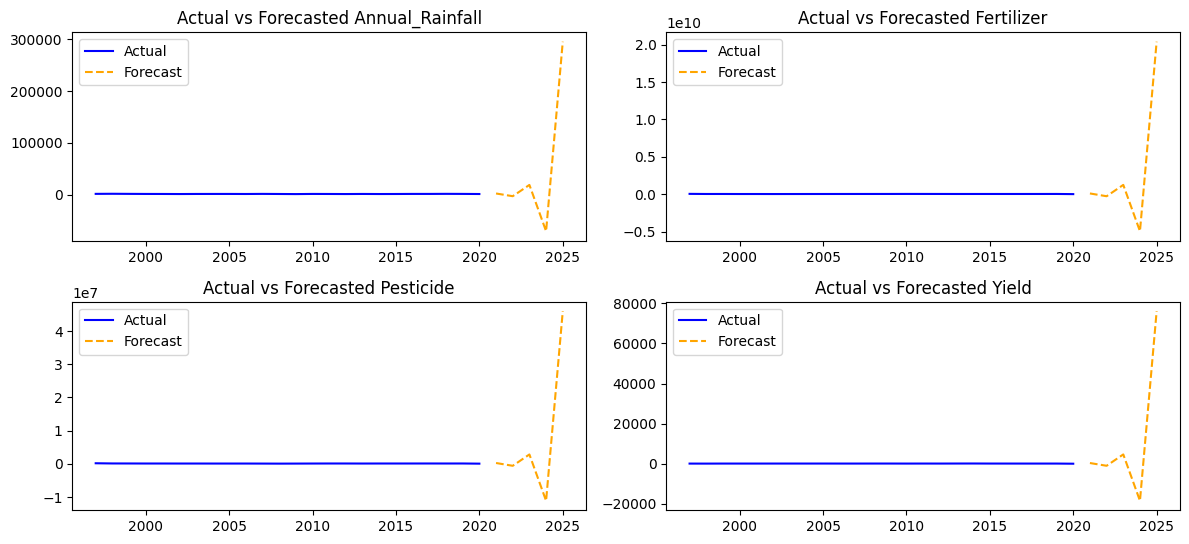

In [ ]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

# Prepare multivariate data (average by year)
multivariate_data = df[['Crop_Year', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].groupby('Crop_Year').mean()

# Fit VAR model with maxlag=3
var_model = VAR(multivariate_data)
fitted_var = var_model.fit(maxlags=3)

# Print the summary of the model
print(fitted_var.summary())

# Forecast for the next 5 periods
forecast_steps = 5
forecast = fitted_var.forecast(y=multivariate_data.values[-3:], steps=forecast_steps)

# Convert forecast to DataFrame
forecast_index = range(multivariate_data.index[-1] + 1, multivariate_data.index[-1] + forecast_steps + 1)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=multivariate_data.columns)

# Plot actual vs forecasted data
plt.figure(figsize=(12, 8))

for i, column in enumerate(multivariate_data.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(multivariate_data.index, multivariate_data[column], label='Actual', color='blue')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast', color='orange', linestyle='--')
    plt.title(f'Actual vs Forecasted {column}')
    plt.legend()

plt.tight_layout()
plt.show()

**PROPHET MODEL**

In [ ]:
pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2wsegww9/gwje_jw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2wsegww9/8m2ixjdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33101', 'data', 'file=/tmp/tmp2wsegww9/gwje_jw8.json', 'init=/tmp/tmp2wsegww9/8m2ixjdr.json', 'output', 'file=/tmp/tmp2wsegww9/prophet_modelcvjtjcgc/prophet_model-20241119122546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:25:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


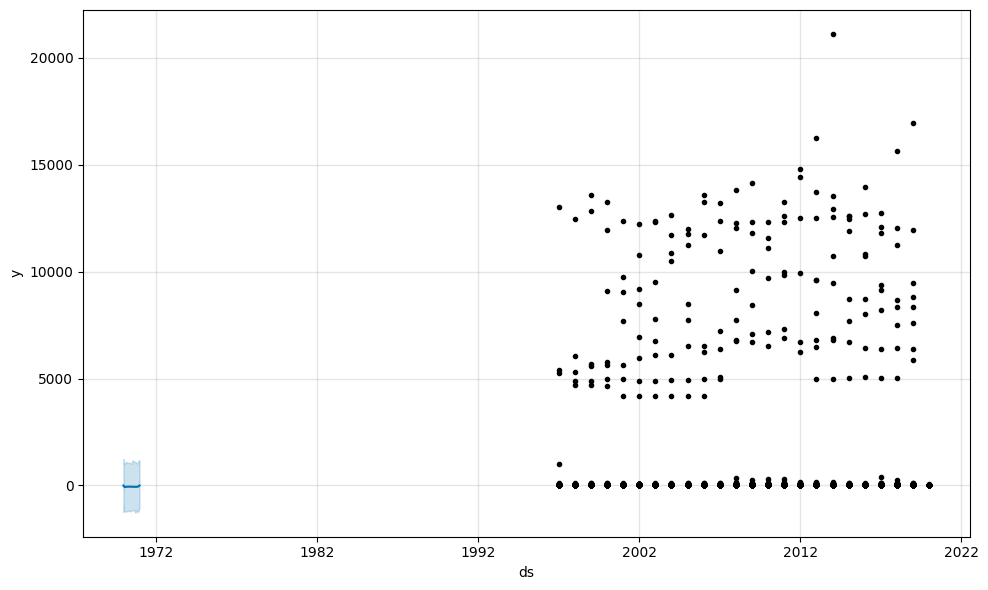

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Rename columns for Prophet
prophet=df.rename(columns={'Crop_Year': 'ds', 'Yield': 'y'}, inplace=True)  # Replace with actual column names

# Initialize Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Adjust periods and freq as needed

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2wsegww9/tka_t64i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2wsegww9/p4wbdbi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95028', 'data', 'file=/tmp/tmp2wsegww9/tka_t64i.json', 'init=/tmp/tmp2wsegww9/p4wbdbi0.json', 'output', 'file=/tmp/tmp2wsegww9/prophet_modelu2tef2ri/prophet_model-20241119122551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:25:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


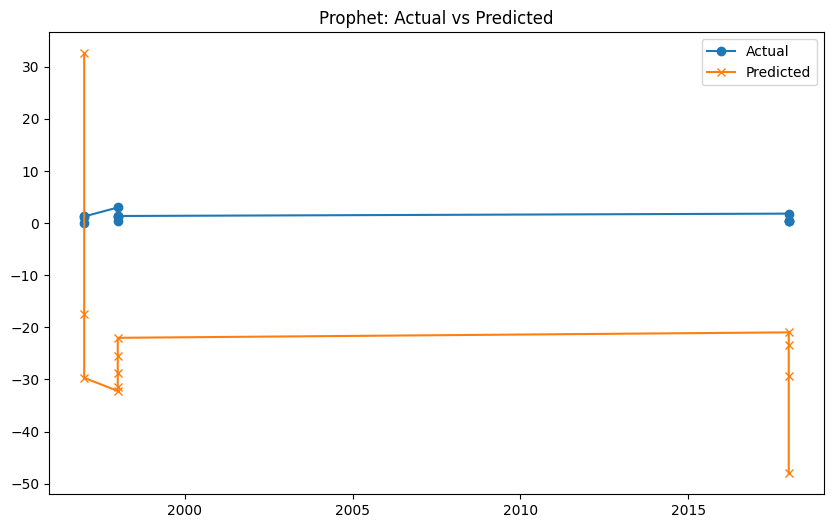

Prophet RMSE: 30.25, MAE: 29.32


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train-Test Split
train = df.iloc[:-12]
test = df.iloc[-12:]

# Prophet Model
model = Prophet()
model.fit(train)

# Forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract predicted and actual values
predicted = forecast.iloc[-12:]['yhat'].values
actual = test['y'].values

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], actual, label='Actual', marker='o')
plt.plot(test['ds'], predicted, label='Predicted', marker='x')
plt.title("Prophet: Actual vs Predicted")
plt.legend()
plt.show()

# Error Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
print(f"Prophet RMSE: {rmse:.2f}, MAE: {mae:.2f}")


In [ ]:
simport pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load dataset
data = pd.read_csv('/content/crop_yield.csv.zip')
data['Crop_Year'] = pd.to_datetime(data['Crop_Year'])  # Replace with actual date column
data.set_index('Crop_Year', inplace=True)

# Train-Test Split
train = data.iloc[:-12]
test = data.iloc[-12:]

# Placeholder for comparison table
comparison_table = pd.DataFrame()

# ---- ARIMA ----
arima_model = ARIMA(train['Yield'], order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=12)

# Add ARIMA results to table
comparison_table['Date'] = test.index
comparison_table['Actual'] = test['Yield'].values
comparison_table['ARIMA_Predicted'] = arima_forecast.values

# ---- SARIMA ----
sarima_model = SARIMAX(train['Yield'],
                       order=(1, 1, 1),  # ARIMA(p, d, q)
                       seasonal_order=(1, 1, 1, 12))  # SARIMA(P, D, Q, S)
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=12)

# Add SARIMA results to table
comparison_table['SARIMA_Predicted'] = sarima_forecast.values

# ---- Prophet ----
prophet_data = train.reset_index().rename(columns={'Crop_Year': 'ds', 'Yield': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)

future_dates = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future_dates)

# Extract Prophet predictions for the test period
prophet_predictions = prophet_forecast.iloc[-12:]['yhat'].values
comparison_table['Prophet_Predicted'] = prophet_predictions

# ---- Error Metrics ----
comparison_table.set_index('Date', inplace=True)
arima_rmse = np.sqrt(mean_squared_error(comparison_table['Actual'], comparison_table['ARIMA_Predicted']))
sarima_rmse = np.sqrt(mean_squared_error(comparison_table['Actual'], comparison_table['SARIMA_Predicted']))
prophet_rmse = np.sqrt(mean_squared_error(comparison_table['Actual'], comparison_table['Prophet_Predicted']))

print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")
print(f"Prophet RMSE: {prophet_rmse:.2f}")

# Display Comparison Table
print("\nComparison Table: Actual vs Predicted")
print(comparison_table)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA RMSE: 14.96
SARIMA RMSE: 24.29
Prophet RMSE: 61523227154537072.00

Comparison Table: Actual vs Predicted
                                 Actual  ARIMA_Predicted  SARIMA_Predicted  \
Date                                                                         
1970-01-01 00:00:00.000002018  0.336667        10.443379         18.749542   
1970-01-01 00:00:00.000002018  0.469091        11.789841         30.448791   
1970-01-01 00:00:00.000002018  0.352759        13.431352         -6.858783   
1970-01-01 00:00:00.000002018  1.825000        15.632132         44.155853   
1970-01-01 00:00:00.000001998  1.370000        18.203349         41.568657   
1970-01-01 00:00:00.000001998  1.225714        21.169558         32.042161   
1970-01-01 00:00:00.000001998  1.441429        15.105096        -13.550938   
1970-01-01 00:00:00.000001998  0.500000        15.888612        -18.043893   
1970-01-01 00:00:00.000001998  3.000000        16.573245         -2.778112   
1970-01-01 00:00:00.000001997  

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
